# INTRODUCCION

"En este proyecto, analizaremos datos de viajes en taxi para identificar los barrios más frecuentados, visualizaremos las empresas con mayor actividad y exploraremos cómo ciertos factores; como la lluvia, afectan la duración de los viajes al aeropuerto. También realizaremos una prueba estadística para comprobar si los viajes desde el centro de la ciudad al Aeropuerto O'Hare son más largos los sábados lluviosos. A lo largo del análisis, usaremos gráficos y explicaremos los resultados de manera clara para llegar a conclusiones basadas en datos."


### OBJETIVOS:

- Cargaremos los datasest e importaremos las librerias
- Estudiaremos los datos que contienen
- Nos aseguraremos que los tipos de datos sean correctos
- Identificaremos los 10 principales barrios en términos de finalización de recorrido
- Haremos graficos: empresas de taxis y número de viajes
- Sacaremos conclusiones de cada grafico, explicaremos los resultados
- Probaremos la siguiente hipotesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
- Decidiremos por nuestra cuenta dónde establecer el nivel de significación (alfa).
- Explicaremos el planteamiento de la hipotesis nula y alternativa, que criterio usamos para probar la hipotesis y porqué

# Carga de datasets e importación de librerias

In [5]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import levene


ModuleNotFoundError: No module named 'pandas'

In [70]:
#Cargamos los datasets
df_company = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_01.csv')
df_dropoff = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_04.csv')
df_final = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_07.csv ')

#  1.Exploración inicial de datos

In [6]:
df_company.head()

NameError: name 'df_company' is not defined

In [72]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [73]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [74]:
# Contar la cantidad de valores únicos en la columna 'company_name'
df_company['company_name'].nunique()

64

In [75]:
#asegurarnos si hay valores duplicados
df_company['company_name'].duplicated().sum()

0

Podemos observar en el dataset de **'df_company'** que hay 64 filas, no hay valores duplicados ni valores nulos, la primer columna tiene valores de tipo objeto que representa el nombre de la compañia de taxi la segunda columna es de tipo entero y representa la cantidad de viajes que ha hecho cada compañia el minimo es de 2 el primer cuartil es de 20 la mediana es de 178 y el maximo es de 19558 viajes la compañia es flash cab!!

In [76]:
df_dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [77]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [78]:
# Función personalizada para redondear los decimales mayores a 6 hacia arriba y truncar los demás
def round_custom(value):
    decimal_part = value - int(value)
    if decimal_part > 0.6:  # Redondear hacia arriba si el decimal es mayor a 0.6
        return int(value) + 1
    else:  # Truncar los decimales menores o iguales a 0.6
        return int(value)

In [79]:
# Aplicar la función personalizada a la columna 'average_trips'
df_dropoff['average_trips'] = df_dropoff['average_trips'].apply(round_custom)


In [80]:
#tipo de datos de la columna 'average_trips'
df_dropoff['average_trips'].dtype

dtype('int64')

In [81]:
df_dropoff.describe()

,average_trips
count,94.000000
mean,599.840426
std,1714.626442
min,2.000000
25%,14.000000
50%,52.000000
75%,298.750000
max,10727.000000


In [82]:
# Observar la cantidad de valores únicos en la columna 'dropoff_location_name'
df_dropoff['dropoff_location_name'].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

In [83]:
#asegurarnos si hay valores duplicados
df_dropoff['dropoff_location_name'].duplicated().sum()

0

Podemos ver la tabla **df_dropoff** con 94 filas y dos columnas, no hay valores nulos ni duplicados, la columna de barrios donde finalizaron los viajes es de tipo objeto y la columna de 'average_trips' era de tipo float, realizamos una función para redondear los decimales mayores a 6 y truncar los demás , apara despues cambiar la columna de avertage_trips por tipo entero. podemos ver que el valor promedio minimo es de 2 el 25% es de 14 la mediana es de 52 y el valor máximo es de 10727 viajes que terminaron en promedio en noviembre de 2017!!

# 2.Creación de graficos: 
# 2.1 Las 10 Compañías de Taxi con Mayor Cantidad de Viajes 
# 2.2 Los 10 Principales Barrios por Número de Finalizaciones

In [84]:
# Ordenar los barrios en función de los promedios de 'average_trips'
top_10_neighborhoods = df_dropoff.sort_values(by='average_trips', ascending=False).head(10)
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


**Gráfico de Empresas de Taxis y Número de Viajes:**

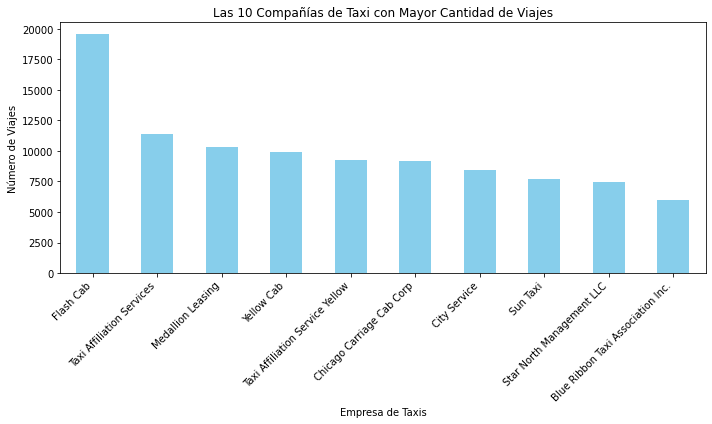

In [85]:
# Seleccionar las 10 compañías de taxi con la mayor cantidad de viajes
top_10_companies = df_company.groupby('company_name')['trips_amount'].sum().nlargest(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar', color='skyblue')
plt.title('Las 10 Compañías de Taxi con Mayor Cantidad de Viajes')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Con este grafico podemos ver de mayor a menor las 10 compañias con mayor catidad de viajes siendo flash cab con casi 20000 viajes seguida de taxi afiliation services apartir de ahgi vemos que no hay mucha de diferencia den cantidad de viajes con las 8b compañias que le siguen

**Gráfico de los 10 Principales Barrios por Número de Finalizaciones:**

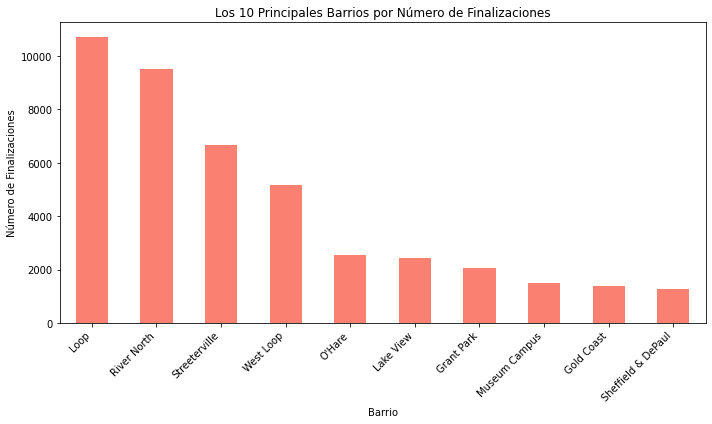

In [86]:
# Obtener los 10 principales barrios por número de finalizaciones
top_10 = df_dropoff.groupby('dropoff_location_name')['average_trips'].sum().nlargest(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='salmon')
plt.title('Los 10 Principales Barrios por Número de Finalizaciones')
plt.xlabel('Barrio')
plt.ylabel('Número de Finalizaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

podemos ver un grafico de mayor a menor numero de finalizaciones de viajes siendo el top 10: siendo  loop  el barrio con mayor numero de finalizacion de viajes con un poco más de 10000 de o'hare en adelante bajo bastante alrededor de 2000 viajes le sigue lake view hasta sheffield and depaul

# 3.HIPOTESIS

In [87]:
df_final.head(15)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [88]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [89]:
df_final.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [90]:
df_final['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [91]:
df_final['start_ts'].dtype

dtype('O')

In [92]:
#cambiar a date time
df_final['start_ts'] = pd.to_datetime(df_final['start_ts'])

In [93]:
df_final['start_ts'].dtype

dtype('<M8[ns]')

In [94]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Podemos observar una tabla con 1068 filas,sin valores nulos ni duplicados, cambiamos el tipo de dato de 'start_ts' de tipo objeto por datetime, tenenmos tres columnas la primera representa la fecha y hora la segunda solo tiene dos valores bueno y malo y la tercera es la duración se segundos es de tipo float podemos ver que el minimo es de 0 segundos el 25% es de 1438 la mediana es de 1980 y el máximo es de 7440 segundos 

# Pruebas estadisticas

Para probar la hipótesis **"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"**, plantearemos las siguientes **hipótesis nula y alternativa:**

**Hipótesis nula (H0):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma los sábados lluviosos que los sábados no lluviosos.

**Hipótesis alternativa (H1):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente los sábados lluviosos que los sábados no lluviosos.

El nivel de significancia (alfa) es la probabilidad de cometer un error de tipo I, es decir, rechazar incorrectamente la hipótesis nula cuando es verdadera. El valor de alfa suele establecerse en 0.05 o 0.01, lo que significa que estamos dispuestos a aceptar una probabilidad del 5% o del 1% de cometer un error de tipo I.

Para probar esta hipótesis, usaríamos un análisis de diferencia de medias entre la duración promedio de los viajes los sábados lluviosos y los sábados no lluviosos. Utilizaríamos un test de hipótesis como la prueba t de Student para muestras independientes.

El proceso sería el siguiente:

In [95]:
# Filtrar los datos para sábados lluviosos y sábados no lluviosos
sabados_lluviosos = df_final[(df_final['start_ts'].dt.dayofweek == 5) & (df_final['weather_conditions'] == 'Bad')]
sabados_no_lluviosos = df_final[(df_final['start_ts'].dt.dayofweek == 5) & (df_final['weather_conditions'] == 'Good')]

In [96]:
# Calcular la duración promedio de los viajes para cada grupo
duracion_promedio_sabados_lluviosos = sabados_lluviosos['duration_seconds'].mean()
duracion_promedio_sabados_no_lluviosos = sabados_no_lluviosos['duration_seconds'].mean()

In [97]:
# Realizar la prueba de Levene para evaluar la homogeneidad de varianzas
statistic, p_value = levene(sabados_lluviosos['duration_seconds'], sabados_no_lluviosos['duration_seconds'])

# Comprobar el valor p resultante
print("Valor p de la prueba de Levene:", p_value)

Valor p de la prueba de Levene: 0.5332038671974493


Dado que el valor p de la prueba de Levene es 0.533, que es mayor que un nivel de significancia comúnmente utilizado como 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de igualdad de varianzas.

En este caso, podemos asumir que las varianzas entre los grupos (sábados lluviosos y sábados no lluviosos) son similares o iguales.

Como las varianzas no son significativamente diferentes, procederemos con la prueba t de Student asumiendo la homogeneidad de varianzas (es decir, estableciendo equal_var=True). Esto significa que podemos interpretar los resultados de la prueba t sin necesidad de ajustes adicionales.

In [98]:
# Realizar la prueba t de Student
t_statistic, p_value_t = ttest_ind(sabados_lluviosos['duration_seconds'], sabados_no_lluviosos['duration_seconds'], equal_var=True)

# Comprobar el valor p resultante de la prueba t
print("Valor p de la prueba t de Student:", p_value_t)

Valor p de la prueba t de Student: 6.517970327099473e-12


# Conclusion

El valor p  que obtuvimos **6.517970327099473e-12** de la prueba t de Student indica que hay una diferencia altamente significativa en la duración promedio de los viajes entre los sábados lluviosos y los sábados no lluviosos.

Dado que el valor p es mucho menor que cualquier nivel de significancia comúnmente utilizado (como 0.05 o 0.01), podemos rechazar con confianza la hipótesis nula de que no hay diferencia en la duración promedio de los viajes entre los dos grupos.

En resumen, **los resultados sugieren que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es significativamente diferente los sábados lluviosos en comparación con los sábados no lluviosos.**

# Conclusion general

"Comenzamos el proyecto analizando los datos para asegurarnos de que fueran completos y correctos. No encontramos valores faltantes ni duplicados, y ajustamos algunos tipos de datos para que el análisis fuera más preciso. Luego, creamos gráficos que mostramos cuáles son las principales compañías de taxis y los barrios con más finalizaciones de viajes.

Finalmente, realizamos una prueba estadística que nos permitió confirmar que la duración promedio de los viajes desde el centro de la ciudad hasta el Aeropuerto O'Hare varía de manera significativa los sábados lluviosos en comparación con los sábados sin lluvia.

Esto nos llevó a rechazar nuestra hipótesis inicial."